## 1. Let's first look at how is the chronical distribution of the publication

In [1]:
import pandas as pd

df = pd.read_pickle('data/covid19_indexed.pickle')

In [2]:
pdate1 = [df.iloc[i]['date-time'] for i in range(len(df))]

In [5]:
pdate2 = pd.to_datetime(pdate1)
pdate2
import pickle
pickle.dump(pdate2, open("data/title30_pdate2.pkl", "wb"))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

Text(0.5, 1.0, 'The number of publication daily')

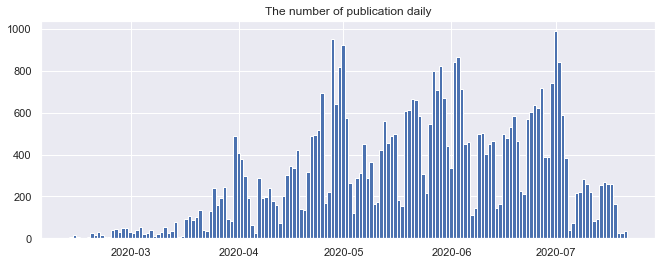

In [63]:
oldest = min(pdate2)
youngest = max(pdate2)
#how many date between those two dates
delta = youngest-oldest
ndays = delta.days
plt.hist(pdate2,ndays)
plt.title('The number of publication daily')

### interesting observation: publication is released often during the weekday. The publishing pattern of two days (low) then five days (high) is noticed. Also there seems a trend of increasing monthly publishing pattern here too.

## 2. Let's see how many co-authors each paper has

In [2]:
da = pd.read_pickle('data/covid19_authors.pickle')

In [3]:
indx = da.isna()
exin = []
for i in range(len(da)):
    if indx.iloc[i]==True:
        exin.append(i)

In [4]:
len(exin)

2295

In [6]:
import numpy as np
na = np.zeros(len(da))
for i in range(3544, len(da)):
    if i in exin:
        na[i] = 0
    else:
        na[i] = len(da.iloc[i])

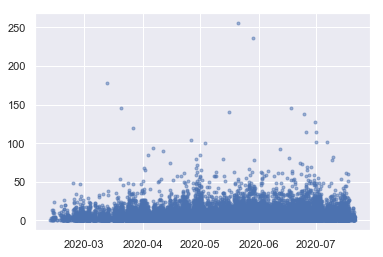

In [54]:
plt.plot(pdate2,na,marker='.', alpha=0.5, linestyle='None')

In [10]:
# the most number of co-authors - 256
da[np.argmax(na)]

29003

### distribution of author numbers - most papers (~72%) has 1-5 co-authors

In [49]:
sum(na<=5)/len(na)

0.7207450197510937

(0, 20)

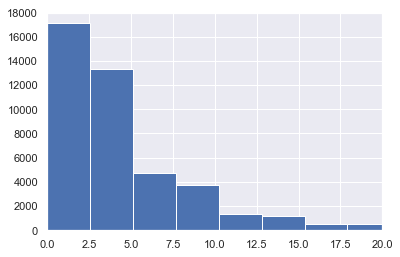

In [46]:
plt.hist(np.trim_zeros(na),100)
plt.xlim([0, 20])

## 3. Check the reference count

In [50]:
dr = pd.read_pickle('data/covid19_reference_count.pickle')

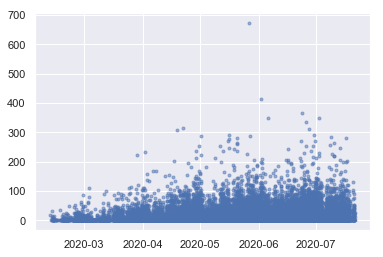

In [53]:
plt.plot(pdate2,dr,marker='.', alpha=0.5, linestyle='None')

### Distribution of the reference count 
- over 60% papers only being cited no more than twice
- ~10% papers being cited more than 30 times.

(0, 60)

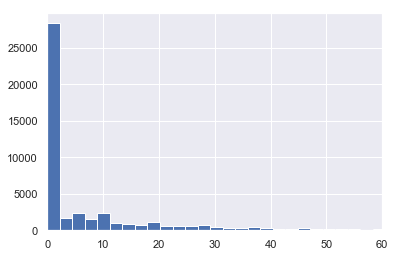

In [69]:
plt.hist(dr,300)
plt.xlim([0, 60])

In [68]:
sum(dr<=2)/len(na)

0.6025782610542412

In [71]:
sum(dr<=30)/len(na)

0.9376247716943465

### questions to think:
1. The more co-authors, the more reference count? any correlation?
2. What are the main topics that are cited a lot more times (>=30 reference count) than other? 
3. What are the main topics that are cited less?
4. Does title and abstract provide the same topic modelling results?